In [394]:
import IP
from IP import imread, imresize, randn, dtfuv, fftfilt, np, imshow, rgb2gray, plt, fft2, ifft2, fftshift
import scipy
from scipy.signal import convolve2d, wiener
import skimage

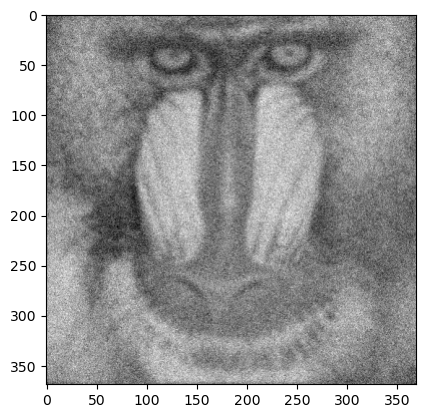

In [367]:
# read broken image with unknown blur and noise
png_I_blur = imread("blurred_noisy_baboon2.png")
rgb_I_blur = png_I_blur[:,:,:3]
I_blur = rgb2gray(rgb_I_blur)
plt.figure()
imshow(I_blur, aspect="equal", cmap="gray")

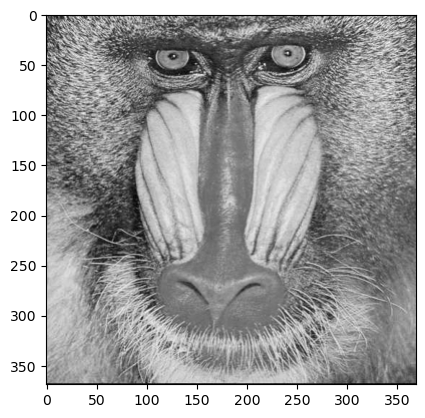

In [34]:
# read ground truth image
I_truth = rgb2gray(imread("baboon.jpg"))
# I_truth = rgb2gray(imread("../tiger.jpg"))
I_truth = imresize(I_truth, I_blur.shape[0], I_blur.shape[1])
plt.figure()
imshow(I_truth, aspect="equal", cmap="gray")

In [35]:
# penalty term function

In [36]:
# # psf estimate function
# # returns "inverse filter"
# def psf_estimate(Ig, Ii, n, noise_signal_ratio=0.001):
#     Igf = fft2(Ig, Ii.shape)
#     Iif = fft2(Ii, Ii.shape)
#     epsilon = 1e-10
#     H = Iif / (Igf+epsilon)
# #     print(np.sum(np.abs(Igf-Iif)**2))
#     plt.imshow(np.log10(1+np.abs(fftshift(H))), aspect="equal", cmap="gray")
#     filename = f'./test6/baboon_{1+n}.png'
#     plt.savefig(filename)
#     return H / H.sum() # normalize

In [102]:
# returns Gaussian lowpass filter
def GLPF(I, D0):
    U,V=dtfuv(I.shape[0],I.shape[1])
    D = IP.np.sqrt(U**2+V**2)
    filt=IP.np.exp(-D**2/(2*(D0**2)))
    return filt

In [103]:
# def wiener(im, mysize=None, noise=None):
#     """
#     Perform a Wiener filter on an N-dimensional array.

#     Apply a Wiener filter to the N-dimensional array `im`.

#     Parameters
#     ----------
#     im : ndarray
#         An N-dimensional array.
#     mysize : int or array_like, optional
#         A scalar or an N-length list giving the size of the Wiener filter
#         window in each dimension.  Elements of mysize should be odd.
#         If mysize is a scalar, then this scalar is used as the size
#         in each dimension.
#     noise : float, optional
#         The noise-power to use. If None, then noise is estimated as the
#         average of the local variance of the input.

#     Returns
#     -------
#     out : ndarray
#         Wiener filtered result with the same shape as `im`.

#     Notes
#     -----
#     This implementation is similar to wiener2 in Matlab/Octave.
#     For more details see [1]_

#     References
#     ----------
#     .. [1] Lim, Jae S., Two-Dimensional Signal and Image Processing,
#            Englewood Cliffs, NJ, Prentice Hall, 1990, p. 548.

#     Examples
#     --------
#     >>> from scipy.datasets import face
#     >>> from scipy.signal import wiener
#     >>> import matplotlib.pyplot as plt
#     >>> import numpy as np
#     >>> rng = np.random.default_rng()
#     >>> img = rng.random((40, 40))    #Create a random image
#     >>> filtered_img = wiener(img, (5, 5))  #Filter the image
#     >>> f, (plot1, plot2) = plt.subplots(1, 2)
#     >>> plot1.imshow(img)
#     >>> plot2.imshow(filtered_img)
#     >>> plt.show()

#     """
#     im = np.asarray(im)
#     if mysize is None:
#         mysize = [3] * im.ndim
#     mysize = np.asarray(mysize)
#     if mysize.shape == ():
#         mysize = np.repeat(mysize.item(), im.ndim)

#     # Estimate the local mean
#     lMean = correlate(im, np.ones(mysize), 'same') / np.prod(mysize, axis=0)

#     # Estimate the local variance
#     lVar = (correlate(im ** 2, np.ones(mysize), 'same') /
#             np.prod(mysize, axis=0) - lMean ** 2)

#     # Estimate the noise power if needed.
#     if noise is None:
#         noise = np.mean(np.ravel(lVar), axis=0)

#     res = (im - lMean)
#     res *= (1 - noise / lVar)
#     res += lMean
#     out = np.where(lVar < noise, lMean, res)

#     return out

In [104]:
# returns wiener filter
def wiener_filt(Ii, H, noise_signal_ratio):
    wiener_f = np.conj(H)/(np.abs(H)**2+(noise_signal_ratio))
    Iif = fft2(Ii, Ii.shape)
    Iif = Iif/Iif.max()
    wiener_f = wiener_f*Iif
    return wiener_f

In [105]:
def covariance(I):
    # Create a shifted version of the image
    shifted_image = np.roll(I, shift=1, axis=0)

    # Flatten the arrays to 1D
    image_flat = I.flatten()
    shifted_image_flat = shifted_image.flatten()

    # Calculate covariance
    covariance = np.cov(image_flat, shifted_image_flat)[0, 1]
#     print("covariance:",covariance)
    return covariance

In [116]:
# # psf estimate function
# # returns "inverse filter"
# def psf_estimate(Iog, Ii, n, noise_signal_ratio=0.001):
# #     Ig_estimate = fft2(Ii)/fft2(GLPF(Ii, 20))
# #     wienerfilter = wiener_filt(Ii, GLPF(Ii, 10), noise_signal_ratio)
#     wienerfilter = fft2(wiener(Ii))
#     Iif = fft2(Ii, Ii.shape)
# #     Iif = Iif/Iif.max()
#     epsilon = 1e-10
# #     H = Iif / (Ig_estimate+epsilon)
#     variance = covariance(Ii)
#     n_variance = (1/Ii.shape[0]**2)*np.sum(covariance(Iif)+1/(Ii.shape[0]**2)*np.abs(wienerfilter)**2)
#     Iogf = fft2(Iog)
#     H = (Iogf*np.conj(wienerfilter))/((Ii.shape[0]**2)*n_variance)
# #     print(np.sum(np.abs(Igf-Iif)**2))
# #     plt.imshow(np.log10(1+np.abs(fftshift(H))), aspect="equal", cmap="gray")
#     plt.imshow(np.abs(ifft2(H)), aspect="equal", cmap="gray")
#     filename = f'./test7/baboon_{1+n}.png'
#     plt.savefig(filename)
# #     return H / H.sum() # normalize
#     return wienerfilter / wienerfilter.sum() # normalize

In [171]:
def psf_estimate(Iog, Ii, n, noise_signal_ratio=0.001):
    wienerfilter = fft2(wiener(Ii))
    plt.imshow(np.abs(ifft2(wienerfilter)), aspect="equal", cmap="gray")
    filename = f'./test7/baboon_{1+n}.png'
    plt.savefig(filename)
    return wienerfilter / wienerfilter.sum()

In [172]:
# def psf_estimate(Iog, Ii, n, noise_signal_ratio=0.001):
#     epsilon = 1e-10
#     Iif = fft2(Ii, Ii.shape)
#     wienerfilter = fft2(wiener(Ii))
#     variance = covariance(Ii)
#     n_variance = (1/Ii.shape[0]**2)*np.sum(variance+1/(Ii.shape[0]**2)*np.abs(wienerfilter)**2)
#     print(variance)
#     H = (Iif*np.conj(wienerfilter))/((Ii.shape[0]**2)*n_variance)
#     plt.imshow(np.log10(1+np.abs(fftshift(H))), aspect="equal", cmap="gray")
#     filename = f'./test7/baboon_{1+n}.png'
#     plt.savefig(filename)
#     return H / H.sum()

In [260]:
def Laplacian(I):
    U,V=dtfuv(512,512)
    D=IP.np.sqrt(V**2+U**2)
    LP=-4*(np.pi**2)*D**2
    return np.abs(fftfilt(I,LP))**0.2

In [289]:
# def psf_estimate(Iog, Ii, n, noise_signal_ratio=0.001):
#     epsilon = 1e-10
#     Iif = fft2(Ii, Ii.shape)
#     w = (wiener(Ii)+ (Laplacian(Ii)/wiener(Ii).max())*0.5)
#     wienerfilter = fft2(w)
#     wienerfilter = wienerfilter/wienerfilter.sum()
# #     wienerfilter = fft2(wiener(Ii))
#     H = Iif / (wienerfilter+epsilon)
#     plt.imshow(np.log10(1+np.abs(fftshift(H))), aspect="equal", cmap="gray")
#     filename = f'./test7/baboon_{1+n}.png'
#     plt.savefig(filename)
#     return H / H.sum()

In [296]:
# def psf_estimate(Iog, Ii, n, noise_signal_ratio=0.001):
#     epsilon = 1e-10
#     Iif = fft2(Ii, Ii.shape)
#     wienerfilter = fft2(wiener(Ii))
#     wienerfilter = wienerfilter/wienerfilter.sum()
#     H = Iif / (wienerfilter+epsilon)
#     plt.imshow(np.log10(1+np.abs(fftshift(H))), aspect="equal", cmap="gray")
#     filename = f'./test7/baboon_{1+n}.png'
#     plt.savefig(filename)
#     return H / H.sum()

In [420]:
def psf_estimate(Iog, Ii, n, noise_signal_ratio=0.001):
    epsilon = 1e-10
    Iif = fft2(Ii, Ii.shape)
    wienerfilter = fft2(wiener(Ii))
    wienerfilter = wienerfilter/wienerfilter.sum()
    variance = covariance(np.log10(1+np.abs(fftshift(Iif))))
    n_variance = (1/Ii.shape[0]**2)*np.sum(variance+1/(Ii.shape[0]**2)*np.abs(wienerfilter)**2)
    print(n_variance)
    H = (Iif*np.conj(wienerfilter))/((Ii.shape[0]**2)*n_variance+epsilon)
    plt.imshow(np.log10(1+np.abs(fftshift(H))), aspect="equal", cmap="gray")
    filename = f'./test7/baboon_{1+n}.png'
    plt.savefig(filename)
    return H / H.sum()

In [421]:
# # iterative loop
# def EM_loop(Ig, Ii, k):
#     estimated_image = Ii
#     for i in range(k):
# #         psf = psf_estimate(Ig, estimated_image, i, 0.001)
#         psf = psf_estimate(Ii, estimated_image, i, 0.001)
#         estimated_image_fft = fft2(estimated_image)
#         psf_fft = fft2(psf, estimated_image.shape)
#         psf_fft = psf_fft/psf_fft.max()
        
#         #penalty term
        
#         #deconvolution
# #         decon_fft = (fft2(Ii) * np.conj(psf_fft)) / (np.abs(psf_fft)**2+estimated_image_fft)
#         epsilon = 1e-10
# #         decon_fft = estimated_image_fft / (psf_fft+epsilon)
#         decon_fft = estimated_image_fft / (psf_fft + epsilon)
        
#         estimated_image = np.abs(ifft2(decon_fft))
# #         estimated_image = np.abs(ifft2(psf))
#         print("loop",i," ",np.sum(np.abs(Ig-(estimated_image/estimated_image.max())*Ig.max())**2))
        
#     return (estimated_image/estimated_image.max())*Ig.max()

In [422]:
# iterative loop for demo purposes
def EM_loop(Ig, Ii, k):
    estimated_image = Ii
    plt.figure(figsize=(10,5))
    IP.subplot(1,2,1);imshow((estimated_image), aspect="equal", cmap="gray"); plt.title(f'Estimated image iter -1')
    IP.subplot(1,2,2);imshow((np.abs(Ig-estimated_image/estimated_image.max())*Ig.max()), aspect="equal", cmap="gray"); plt.title(f'Difference from ground truth iter -1')

    filename = f'./test9/baboon_0.png'
    plt.savefig(filename)
    for i in range(k):
        psf = psf_estimate(Ii, estimated_image, i, 0.001)
        estimated_image_fft = fft2(estimated_image)
        psf_fft = fft2(psf, estimated_image.shape)
        psf_fft = psf_fft/psf_fft.max()
        
        #penalty term
        
        #deconvolution
        epsilon = 1e-10
        decon_fft = estimated_image_fft / (psf_fft + epsilon)
        
        estimated_image = np.abs(ifft2(decon_fft))
        print("loop",i," ",np.sum(np.abs(Ig-(estimated_image/estimated_image.max())*Ig.max())**2))
        plt.figure(figsize=(10,5))
        IP.subplot(1,2,1);imshow((estimated_image), aspect="equal", cmap="gray"); plt.title(f'Estimated image iter {i}')
        IP.subplot(1,2,2);imshow((np.abs(Ig-estimated_image/estimated_image.max())*Ig.max()), aspect="equal", cmap="gray"); plt.title(f'Difference from ground truth iter {i}')
        
        filename = f'./test10/baboon_{1+i}.png'
        plt.savefig(filename)
        plt.close()
        
    return (estimated_image/estimated_image.max())*Ig.max()

In [427]:
# iterative loop without ground truth
def EM_loop(Ii, k):
    estimated_image = Ii
    plt.figure(figsize=(10,5))
    IP.subplot(1,2,1);imshow(Ii, aspect="equal", cmap="gray"); plt.title(f'Broken image iter -1')
    IP.subplot(1,2,2);imshow(estimated_image, aspect="equal", cmap="gray"); plt.title(f'Estimated image -1')

    filename = f'./test10/baboon_0.png'
    plt.savefig(filename)
    for i in range(k):
        psf = psf_estimate(Ii, estimated_image, i, 0.001)
        estimated_image_fft = fft2(estimated_image)
        psf_fft = fft2(psf, estimated_image.shape)
        psf_fft = psf_fft/psf_fft.sum()
        
        #penalty term
        
        #deconvolution
        epsilon = 1e-10
        decon_fft = estimated_image_fft / (psf_fft + epsilon)
        
        estimated_image = np.abs(ifft2(decon_fft))
        estimated_image = estimated_image/estimated_image.max()*Ii.max()
        plt.figure(figsize=(10,5))
        IP.subplot(1,2,1);imshow((Ii), aspect="equal", cmap="gray"); plt.title(f'Broken image')
        IP.subplot(1,2,2);imshow(skimage.exposure.equalize_hist(estimated_image/estimated_image.max()*Ii.max()), aspect="equal", cmap="gray"); plt.title(f'Estimated image iter {i}')
#         IP.subplot(1,2,2);imshow((estimated_image/estimated_image.max())*Ii.max(), aspect="equal", cmap="gray"); plt.title(f'Estimated image iter {i}')

        filename = f'./test10/baboon_{1+i}.png'
        plt.savefig(filename)
        plt.close()
        
    return (estimated_image/estimated_image.max())*Ii.max()

In [428]:
# w = wiener_filt(I_blur, GLPF(I_blur, 10), 0.001)
# imshow(np.abs(ifft2(w)))

In [429]:
# ww = wiener(I_blur)
# IP.subplot(1,2,1);imshow(I_blur, aspect="equal", cmap="gray"); plt.title('Broken image')
# IP.subplot(1,2,2);imshow(ww, aspect="equal", cmap="gray"); plt.title('Post Wiener')

0.10396137630172937
0.10427378710936029
0.10308714926265673
0.09927385489916098
0.09528886067328723
0.09128361357611828
0.08729294429977978
0.08354485818093493
0.07998140678513738
0.0767298609409403
0.07373494395892019
0.07124534190914915
0.06906796780770952
0.06695355652192184
0.0645981405563516
0.06157418838905166
0.05532312684429423
0.04656115507770505
0.03828314070888277
0.033318896694295885
0.03201880690176345
0.033335333357425
0.03448373933550312
0.035001696589275676
0.03490949991547965
0.03442995221778931
0.033434705167067674
0.03287393251340654
0.03164187944790808
0.030813291910223393
0.02998943802431896
0.028695653275649144
0.02854694507393953
0.027027964851838688
0.02743457127792823
0.024957427667935194
0.025041267925835557
0.023609272247233293
0.024138408894901407
0.022212857836673414
0.023177120188422492
0.02077655562687066
0.021686517787397445
0.019494465652049094
0.019967031317230353
0.01844456154503687
0.01874036297389511
0.017341635125226084
0.01797418192050783
0.016469

ValueError: operands could not be broadcast together with shapes (369,369) (672,504) 

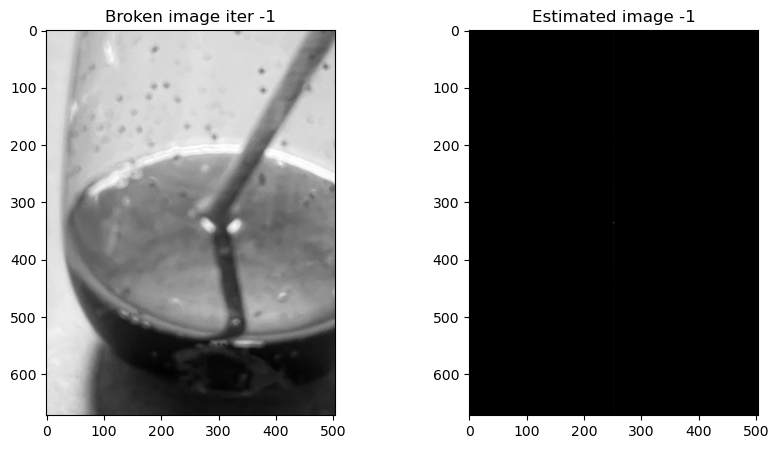

In [431]:
# png_I_blur = imread("keyboard.png")
# rgb_I_blur = png_I_blur[:,:,:3]
# I_blur = rgb2gray(rgb_I_blur)
I_blur = rgb2gray(imread("cup.jpg"))
I_blur = imresize(I_blur,504,672)
# estimate = EM_loop(I_truth, I_blur, 60)
estimate = EM_loop(I_blur, 60)
print("final error", np.sum(np.abs(I_truth-estimate)**2))
plt.figure(figsize=(9,3))
IP.subplot(1,4,1);imshow(I_truth, aspect="equal", cmap="gray"); plt.title('Original image')
IP.subplot(1,4,2);imshow(I_blur, aspect="equal", cmap="gray"); plt.title('Broken image')
IP.subplot(1,4,3);imshow(estimate, aspect="equal", cmap="gray"); plt.title('Deblur of Gaussian w/ noise')
IP.subplot(1,4,4);imshow(np.abs(I_truth-estimate), aspect="equal", cmap="gray"); plt.title('Difference')